In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
data= pd.read_csv('D:\Working-project\Dataset.csv')

<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Parth\AppData\Local\Temp\ipykernel_2880\2753803843.py:1: SyntaxWarning: invalid escape sequence '\W'
  data= pd.read_csv('D:\Working-project\Dataset.csv')


In [4]:
data.head()

,Age,Systolic BP,Diastolic,BS,Body Temp,Heart Rate,Risk Level
0,22,90.0,60.0,9.0,100,80.0,High
1,22,110.0,70.0,7.1,98,74.0,Low
2,27,110.0,70.0,7.5,98,72.0,Low
3,20,100.0,70.0,7.2,98,74.0,Low
4,20,90.0,60.0,7.5,98,74.0,Low


In [5]:
data.tail()

,Age,Systolic BP,Diastolic,BS,Body Temp,Heart Rate,Risk Level
1200,41,140.0,95.0,16.0,98,90.0,High
1201,25,110.0,90.0,6.0,98,92.0,High
1202,21,150.0,110.0,4.9,98,66.0,High
1203,23,130.0,100.0,5.1,98,60.0,High
1204,26,120.0,90.0,6.7,98,58.0,High


In [6]:
print(data.describe())
print(data['Risk Level'].unique())


               Age  Systolic BP    Diastolic           BS    Body Temp  \
count  1205.000000  1200.000000  1201.000000  1203.000000  1205.000000   
mean     27.731950   116.819167    77.166528     7.501064    98.395851   
std      12.571074    18.715502    14.305148     3.049522     1.088363   
min      10.000000    70.000000    40.000000     3.000000    97.000000   
25%      21.000000   100.000000    65.000000     6.000000    98.000000   
50%      25.000000   120.000000    80.000000     6.900000    98.000000   
75%      32.000000   130.000000    90.000000     7.900000    98.000000   
max     325.000000   200.000000   140.000000    19.000000   103.000000   

        Heart Rate  
count  1203.000000  
mean     75.817124  
std       7.227338  
min      58.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      92.000000  
['High' 'Low' nan]


HANDLING MISSING DATA

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data.shape # number of row and coloums 

(1205, 7)

In [ ]:
data.isnull().sum() #missing value of the data

Age             0
Systolic BP     5
Diastolic       4
BS              2
Body Temp       0
Heart Rate      2
Risk Level     18
dtype: int64

DORPPING UNWANTED VALUES

In [10]:
working_data=data.drop(columns=['BMI','Preexisting Diabetes','Previous Complications','Gestational Diabetes','Mental Health'])

KeyError: "['BMI', 'Preexisting Diabetes', 'Previous Complications', 'Gestational Diabetes', 'Mental Health'] not found in axis"

In [11]:
working_data.shape
working_data.isnull().sum()

Age             0
Systolic BP     5
Diastolic       4
BS              2
Body Temp       0
Heart Rate      2
Risk Level     18
dtype: int64

GRAHPICAL REPRESENTING THE DATAS

In [12]:
df = pd.DataFrame(working_data)

In [13]:
"""fig,ax=plt.subplots(figsize=(8,8))
sns.distplot(df['Risk Level'])"""

"fig,ax=plt.subplots(figsize=(8,8))\nsns.distplot(df['Risk Level'])"

C:\Users\Parth\AppData\Local\Temp\ipykernel_3312\954748126.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(working_data['Systolic BP'])


<Axes: xlabel='Systolic BP', ylabel='Density'>

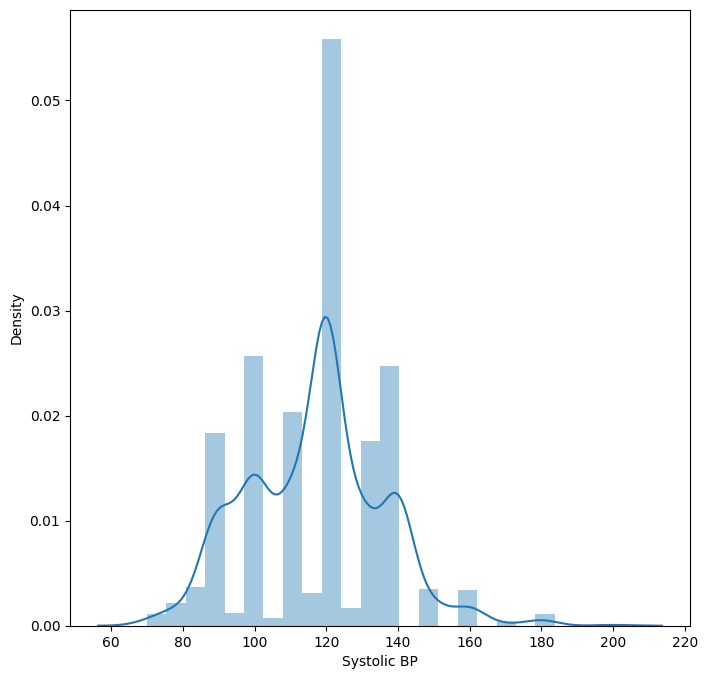

In [14]:
fig,ax=plt.subplots(figsize=(8,8))
sns.distplot(working_data['Systolic BP'])

REPLACEING THE MISSING VALUES

In [15]:
mode_value = ['Systolic BP','BS','Risk Level','Diastolic','Heart Rate']

for i in mode_value:
    mode_value=df[i].mode()[0]
    df[i].fillna(mode_value,inplace=True)


C:\Users\Parth\AppData\Local\Temp\ipykernel_3312\29699825.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(mode_value,inplace=True)


In [16]:
df.isnull().sum()

Age            0
Systolic BP    0
Diastolic      0
BS             0
Body Temp      0
Heart Rate     0
Risk Level     0
dtype: int64

DATA STANDARDIZATION

In [17]:
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm 
from sklearn.metrics import accuracy_score

CONVERTING THE OBJECT(RISK_LEVEL) INTO NUMERIC

In [18]:
encoder=LabelEncoder()
df['Risk Level']=encoder.fit_transform(df['Risk Level'])
print(df)

      Age  Systolic BP  Diastolic    BS  Body Temp  Heart Rate  Risk Level
0      22         90.0       60.0   9.0        100        80.0           0
1      22        110.0       70.0   7.1         98        74.0           1
2      27        110.0       70.0   7.5         98        72.0           1
3      20        100.0       70.0   7.2         98        74.0           1
4      20         90.0       60.0   7.5         98        74.0           1
...   ...          ...        ...   ...        ...         ...         ...
1200   41        140.0       95.0  16.0         98        90.0           0
1201   25        110.0       90.0   6.0         98        92.0           0
1202   21        150.0      110.0   4.9         98        66.0           0
1203   23        130.0      100.0   5.1         98        60.0           0
1204   26        120.0       90.0   6.7         98        58.0           0

[1205 rows x 7 columns]


In [19]:
"""scaler=StandardScaler()
standardized_data=scaler.fit_transform(df)
standardized_df=pd.DataFrame(standardized_data,columns=df.columns)
print(standardized_df)"""

'scaler=StandardScaler()\nstandardized_data=scaler.fit_transform(df)\nstandardized_df=pd.DataFrame(standardized_data,columns=df.columns)\nprint(standardized_df)'

SEPARATING FEARTURES AND TARGET VALUES

In [102]:
target_column='Risk Level'
x=df.drop(columns=[target_column])
y=df[target_column]

In [103]:
print(x)

      Age  Systolic BP  Diastolic    BS  Body Temp  Heart Rate
0      22         90.0       60.0   9.0        100        80.0
1      22        110.0       70.0   7.1         98        74.0
2      27        110.0       70.0   7.5         98        72.0
3      20        100.0       70.0   7.2         98        74.0
4      20         90.0       60.0   7.5         98        74.0
...   ...          ...        ...   ...        ...         ...
1200   41        140.0       95.0  16.0         98        90.0
1201   25        110.0       90.0   6.0         98        92.0
1202   21        150.0      110.0   4.9         98        66.0
1203   23        130.0      100.0   5.1         98        60.0
1204   26        120.0       90.0   6.7         98        58.0

[1205 rows x 6 columns]


In [104]:
print(y)

0       0
1       1
2       1
3       1
4       1
       ..
1200    0
1201    0
1202    0
1203    0
1204    0
Name: Risk Level, Length: 1205, dtype: int64


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=3)

In [24]:
print(x.shape,x_train.shape,x_test.shape)

(1205, 6) (964, 6) (241, 6)


In [25]:
scaler=StandardScaler()

In [26]:
scaler.fit(x_train)

StandardScaler()

In [27]:
x_train_standardized=scaler.transform(x_train)

In [28]:
print(x_train_standardized)

[[-0.05920217  0.14092591  0.8571222   0.00637038 -0.35114127  0.04678691]
 [ 3.03766777  1.19979242  1.20449704  3.7849675  -0.35114127  0.18685702]
 [ 0.27260533  0.14092591  0.16237251  0.49923087 -0.35114127 -2.19433498]
 ...
 [ 0.49381032  1.19979242  0.8571222   0.82780453 -0.35114127  1.72762832]
 [-0.50161216 -0.38850735  0.16237251 -1.30792428 -0.35114127 -0.51349356]
 [-0.83341965  0.14092591 -0.53237717  0.17394294  2.50942364  1.16734785]]


In [29]:
x_test_standardized=scaler.transform(x_test)

In [30]:
print(x_test_standardized)

[[ 0.16200283 -0.91794061 -0.53237717 -0.12505909  1.55590201  0.04678691]
 [ 2.26345028  0.14092591  0.16237251  1.15637819 -0.35114127  1.72762832]
 [-0.61221466 -0.91794061 -0.87975201 -0.15791646 -0.35114127  0.60706738]
 ...
 [ 0.60441282  2.25865893  1.55187188  1.48495186 -0.35114127  1.16734785]
 [-0.94402215  0.14092591 -0.18500233 -1.01220798 -0.35114127 -1.35391427]
 [ 1.04682281  0.14092591  0.8571222   1.15637819 -0.35114127  1.72762832]]


In [31]:
print(x_train_standardized.std())
print(x_test_standardized.std())

1.0
1.3529856005016436


LABLE ENCODING

In [32]:
working_data['Risk Level'].value_counts()

Risk Level
Low     731
High    474
Name: count, dtype: int64

High-----> 0

Low------> 1

In [33]:
label_encode=LabelEncoder()

In [34]:
labels=label_encode.fit_transform(working_data['Risk Level'])

In [35]:
working_data['target']=labels

In [84]:
working_data.head()

,Age,Systolic BP,Diastolic,BS,Body Temp,Heart Rate,Risk Level,target
0,22,90.0,60.0,9.0,100,80.0,High,0
1,22,110.0,70.0,7.1,98,74.0,Low,1
2,27,110.0,70.0,7.5,98,72.0,Low,1
3,20,100.0,70.0,7.2,98,74.0,Low,1
4,20,90.0,60.0,7.5,98,74.0,Low,1


In [37]:
working_data['target'].value_counts()

target
1    731
0    474
Name: count, dtype: int64

In [38]:
working_data['target'] = working_data['target'].fillna(working_data['target'].median())

In [39]:
working_data.isnull().sum()

Age            0
Systolic BP    0
Diastolic      0
BS             0
Body Temp      0
Heart Rate     0
Risk Level     0
target         0
dtype: int64

In [85]:
print(x)
print(y)

      Age  Systolic BP  Diastolic    BS  Body Temp  Heart Rate
0      22         90.0       60.0   9.0        100        80.0
1      22        110.0       70.0   7.1         98        74.0
2      27        110.0       70.0   7.5         98        72.0
3      20        100.0       70.0   7.2         98        74.0
4      20         90.0       60.0   7.5         98        74.0
...   ...          ...        ...   ...        ...         ...
1200   41        140.0       95.0  16.0         98        90.0
1201   25        110.0       90.0   6.0         98        92.0
1202   21        150.0      110.0   4.9         98        66.0
1203   23        130.0      100.0   5.1         98        60.0
1204   26        120.0       90.0   6.7         98        58.0

[1205 rows x 6 columns]
0       0
1       1
2       1
3       1
4       1
       ..
1200    0
1201    0
1202    0
1203    0
1204    0
Name: Risk Level, Length: 1205, dtype: int64


In [41]:
classifier=svm.SVC(kernel='linear')

In [86]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [43]:
x_train_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [44]:
print("Accuracy score of the training data",training_data_accuracy)

Accuracy score of the training data 0.8952282157676349


In [48]:
x_test_prediction=classifier.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [47]:
print("Accuracy score of the test data",test_data_accuracy)

Accuracy score of the test data 0.8879668049792531


In [89]:
print(y_train)

1096    0
902     0
1075    0
942     1
922     1
       ..
66      0
1152    0
895     0
382     1
926     0
Name: Risk Level, Length: 964, dtype: int64


In [88]:
print(x_train)

      Age  Systolic BP  Diastolic     BS  Body Temp  Heart Rate
1096   27        120.0       90.0   7.50         98        76.0
902    55        140.0       95.0  19.00         98        77.0
1075   30        120.0       80.0   9.00         98        60.0
942    29        120.0       70.0   7.00         98        70.0
922    26        110.0       80.0   5.80         98        74.0
...   ...          ...        ...    ...        ...         ...
66     19        130.0       90.0   9.00        100        88.0
1152   20         95.0       60.0   6.50         98        64.0
895    32        140.0       90.0  10.00         98        88.0
382    23        110.0       80.0   3.50         98        72.0
926    20        120.0       70.0   8.01        101        84.0

[964 rows x 6 columns]


PREDICTION PART


In [90]:
# 22,90.0,60.0,9.0,100,80.0
input_data=(27,120.0,90.0,7.50,98,76.0)

In [91]:
feature_names = ['Age','Systolic BP','Diastolic','BS','Body Temp','Heart Rate']

In [92]:
input_data_df = pd.DataFrame([input_data], columns=feature_names)

In [93]:
std_data = scaler.transform(input_data_df)

In [98]:
prediction = classifier.predict(std_data)
print(prediction)

[1]


d:\Working-project\.conda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [106]:
if hasattr(classifier, 'predict_proba'):
    prediction_probabilities = classifier.predict_proba(std_data)
    print("Prediction Probabilities:\n", prediction_probabilities)

In [107]:
input_data_as_numpy_array=np.asarray([input_data])
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)
std_data=scaler.transform(input_data_reshaped)
prediction=classifier.predict(std_data)

d:\Working-project\.conda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\Working-project\.conda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [108]:
print("Input data:", input_data)
print("Standardized data:", std_data)
print("Prediction:", prediction)

Input data: (27, 120.0, 90.0, 7.5, 98, 76.0)
Standardized data: [[-0.05920217  0.14092591  0.8571222   0.00637038 -0.35114127  0.04678691]]
Prediction: [1]


In [109]:
print(df)

      Age  Systolic BP  Diastolic    BS  Body Temp  Heart Rate  Risk Level
0      22         90.0       60.0   9.0        100        80.0           0
1      22        110.0       70.0   7.1         98        74.0           1
2      27        110.0       70.0   7.5         98        72.0           1
3      20        100.0       70.0   7.2         98        74.0           1
4      20         90.0       60.0   7.5         98        74.0           1
...   ...          ...        ...   ...        ...         ...         ...
1200   41        140.0       95.0  16.0         98        90.0           0
1201   25        110.0       90.0   6.0         98        92.0           0
1202   21        150.0      110.0   4.9         98        66.0           0
1203   23        130.0      100.0   5.1         98        60.0           0
1204   26        120.0       90.0   6.7         98        58.0           0

[1205 rows x 7 columns]


In [110]:
# Assuming 'df' is your DataFrame
print(df.columns)

Index(['Age', 'Systolic BP', 'Diastolic', 'BS', 'Body Temp', 'Heart Rate',
       'Risk Level'],
      dtype='object')
